First 5 rows of the dataset:


,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
0,2000,2.0,4,11.2,228
1,2000,4.7,8,18.8,382
2,2000,4.8,8,18.9,373
3,2000,4.6,8,18.5,380
4,2000,4.2,6,17.3,359


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              511 non-null    int64  
 1   ENGINE SIZE       511 non-null    float64
 2   CYLINDERS         511 non-null    int64  
 3   FUEL CONSUMPTION  511 non-null    float64
 4   COEMISSIONS       511 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 20.1 KB
Summary statistics of the dataset:


,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,511.0,511.000000,511.000000,511.000000,511.000000
mean,2000.0,3.206654,5.726027,14.532485,293.213307
std,0.0,1.194413,1.520864,3.164069,63.158713
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.200000,251.000000
50%,2000.0,3.000000,6.000000,14.200000,283.000000
75%,2000.0,4.000000,6.000000,16.500000,336.000000
max,2000.0,8.000000,12.000000,26.300000,495.000000


Missing values in the dataset:


Year                0
ENGINE SIZE         0
CYLINDERS           0
FUEL CONSUMPTION    0
COEMISSIONS         0
dtype: int64

Plotting histograms for numerical columns:


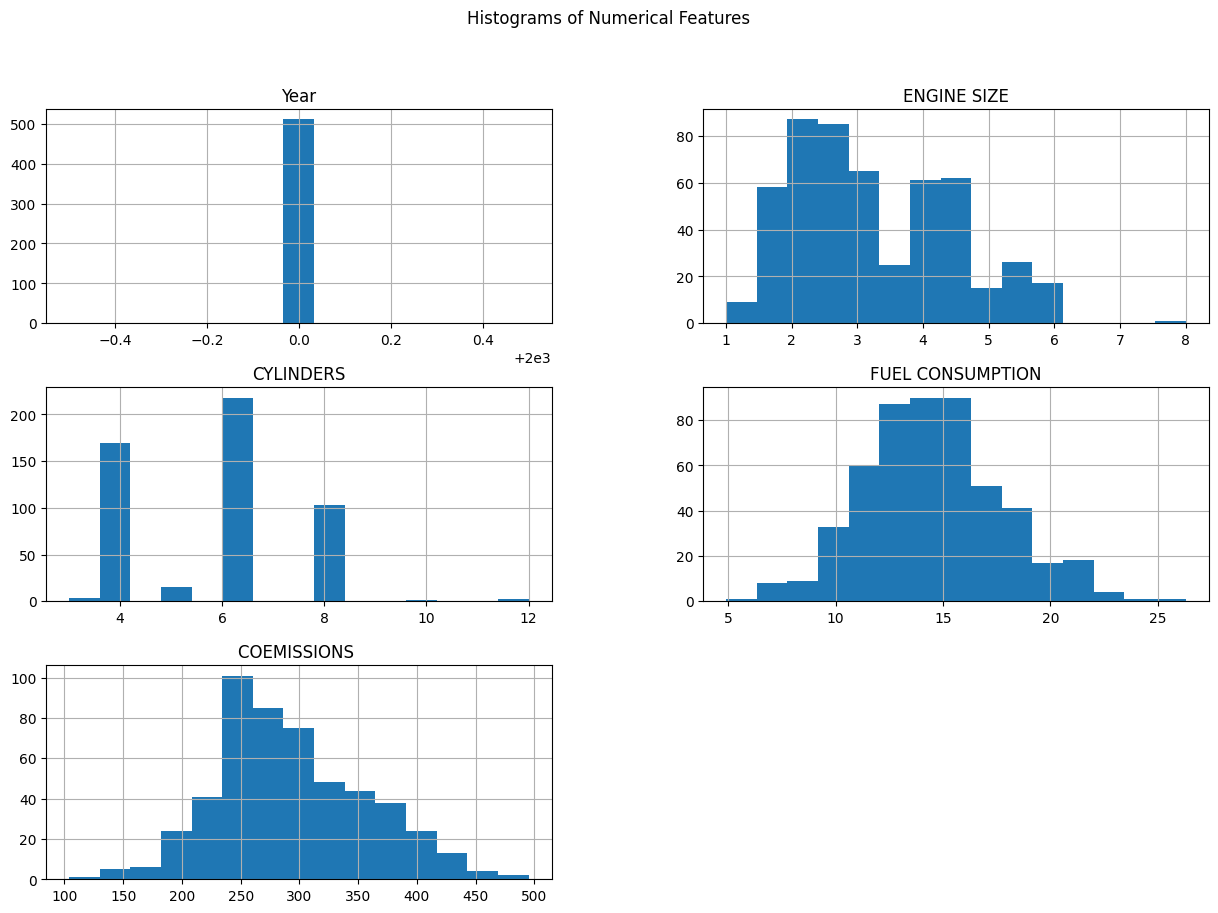

Plotting boxplots to detect outliers:


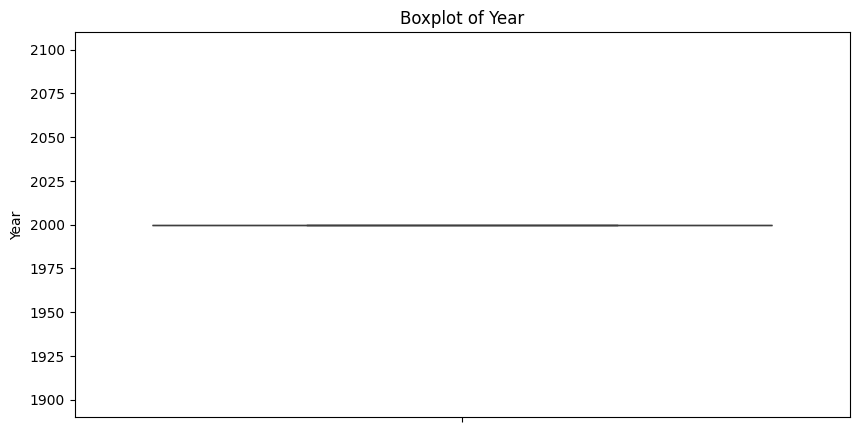

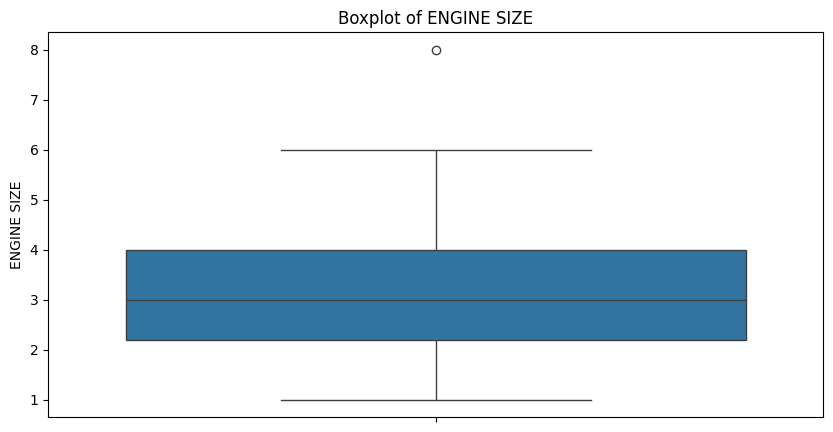

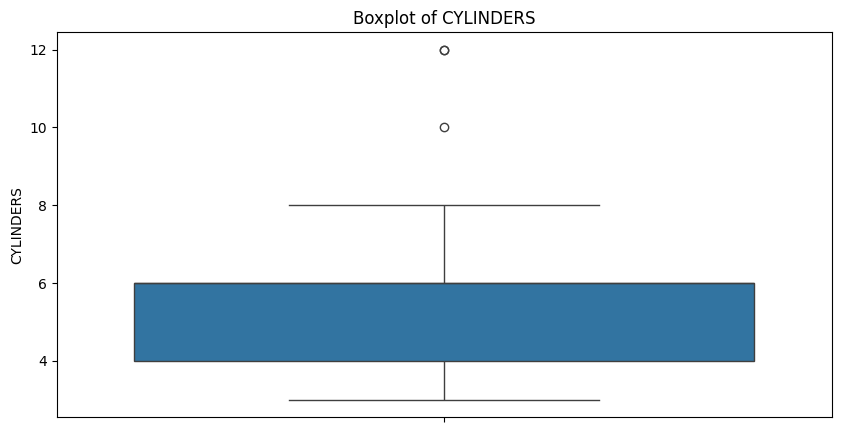

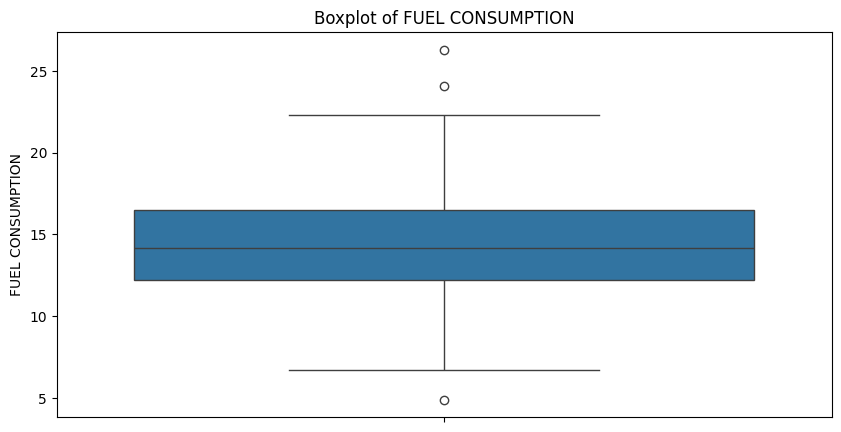

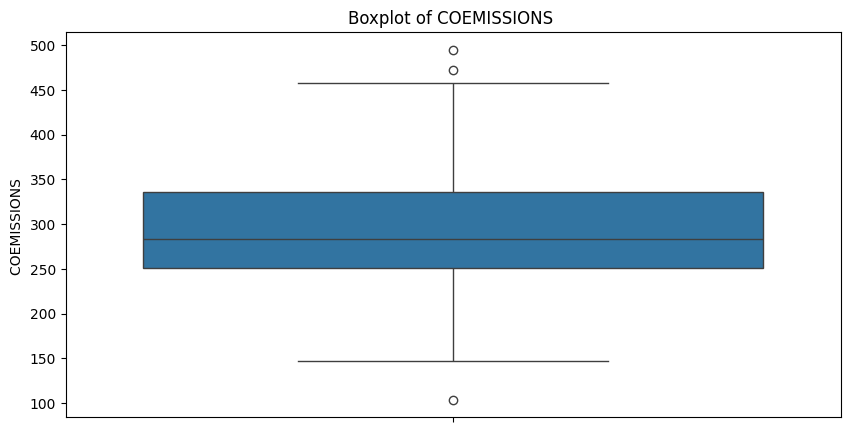

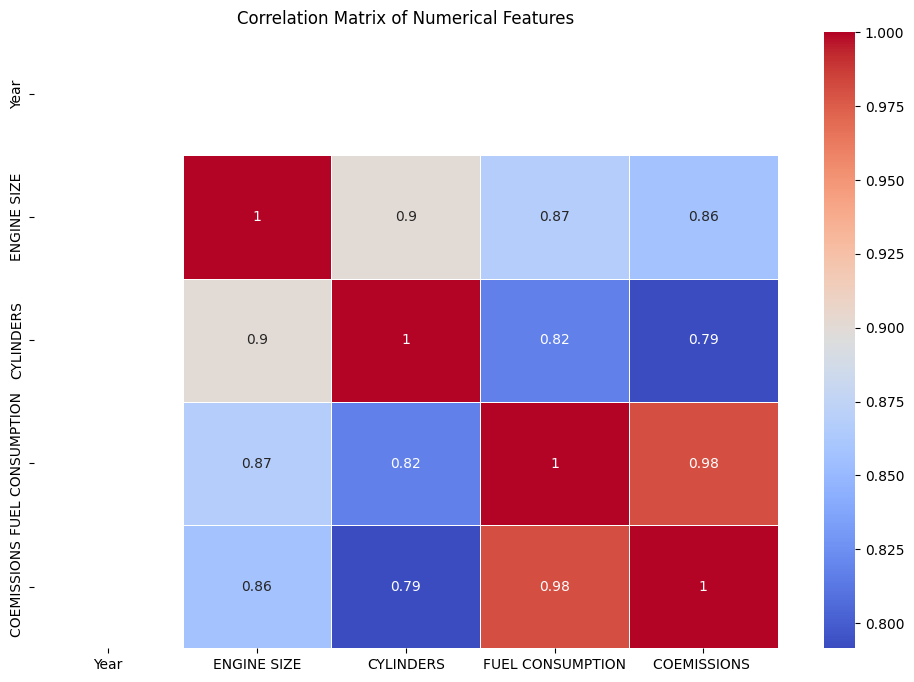

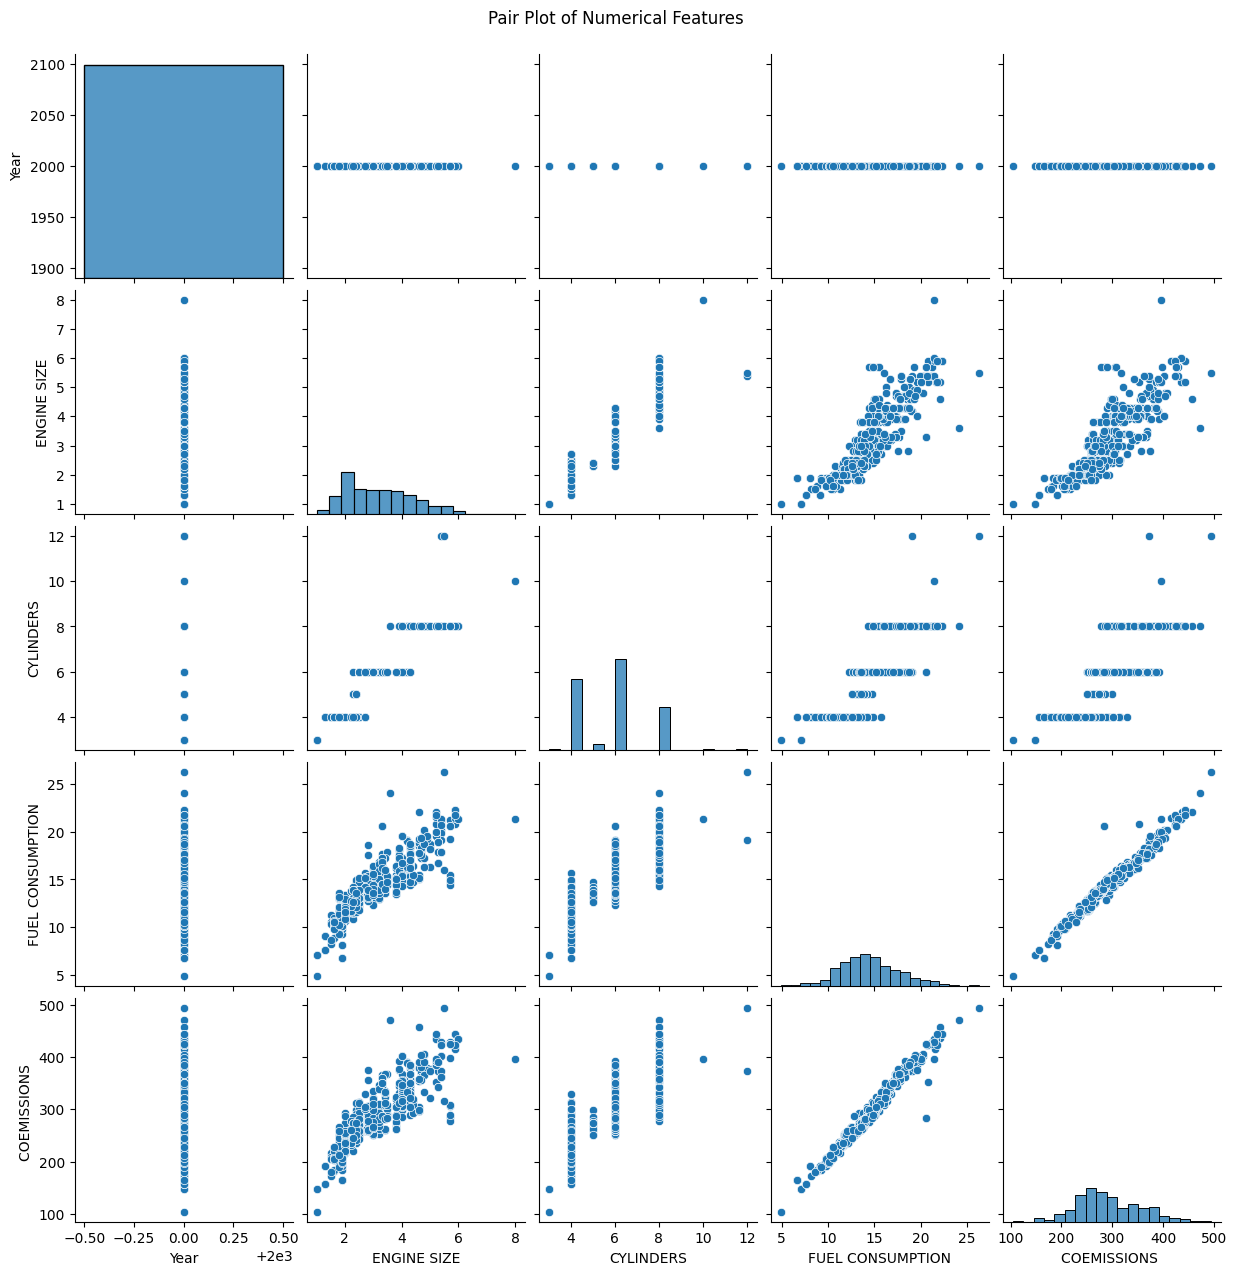

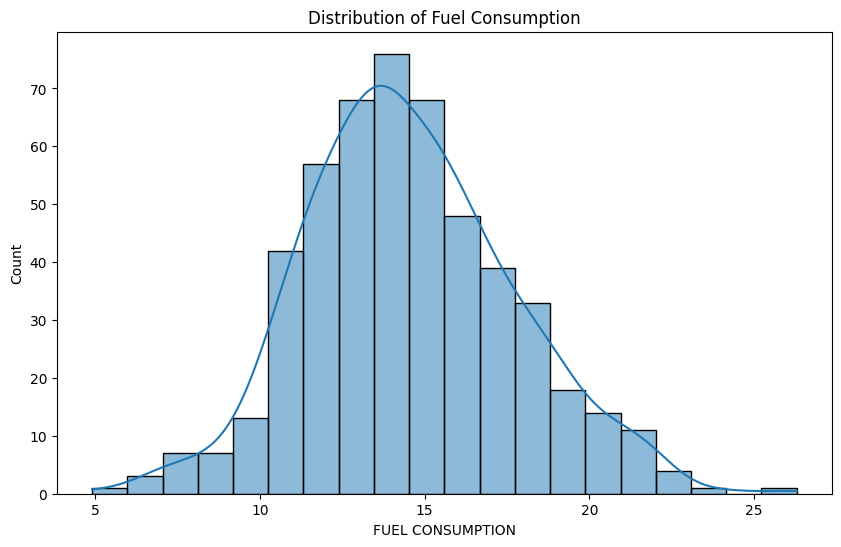

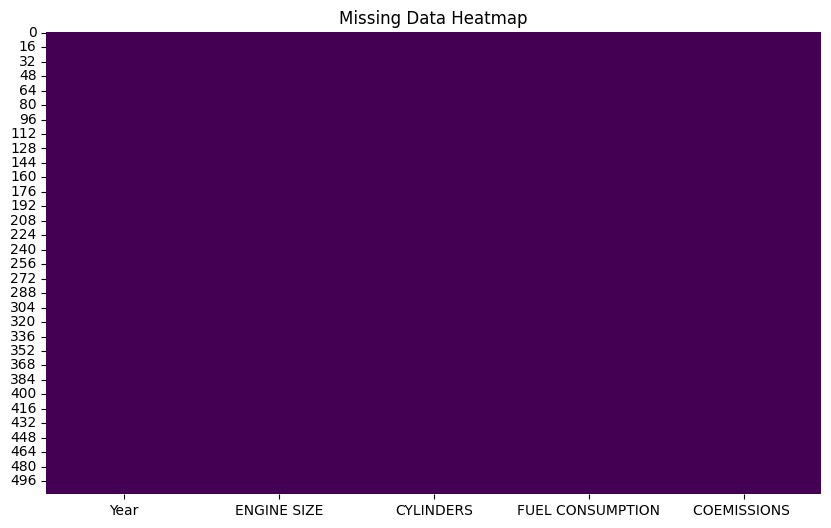

Number of duplicate rows: 128


In [7]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset
file_path = '../data/fuel_train.csv' 
data = pd.read_csv(file_path)

# Drop or encode categorical columns
# Option 1: Drop categorical columns
data = data.drop(columns=['MAKE', 'MODEL', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL'])

# Option 2: One-hot encode categorical columns (have saved as a comment, but could be used if needed)
# data = pd.get_dummies(data, columns=['MAKE', 'MODEL', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL'], drop_first=True)

# Inspect the Data
print("First 5 rows of the dataset:")
display(data.head())

print("Dataset Info:")
data.info()

# Summary Statistics
print("Summary statistics of the dataset:")
display(data.describe())

# Check for Missing Values
print("Missing values in the dataset:")
display(data.isnull().sum())

# Histograms for numerical variables
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print("Plotting histograms for numerical columns:")
data[numerical_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Boxplots to Detect Outliers
print("Plotting boxplots to detect outliers:")
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Pair Plot for Numerical Variables
sns.pairplot(data[numerical_cols])
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

# Distribution plot of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['FUEL CONSUMPTION'], bins=20, kde=True)
plt.title('Distribution of Fuel Consumption')
plt.show()

# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Optionally, drop duplicates
# data = data.drop_duplicates()
